<a href="https://colab.research.google.com/github/NorahEkuttan/Autolib-dataset/blob/main/WiDS_Triple_Negative_Breast_Cancer_Datathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

At the WiDS 2024 Datathon challenge #1, we are studying Triple Negative Breast cancer. This is an important and potentially fatal condition facing women around the world. Our dataset consists of variables that are tracked by pharmaceutical companies (Gilead) as well as demographic, economic and air toxicology data that might affect the outcome of prompt diagnosis. In this tutorial, I will walk you through the basic steps of exploratory data analysis, and help you set up your dataset for machine learning.

# PRIMARY GOAL
1.detect relationships between demographics of the patient with the likelihood of getting timely treatment.

2.The secondary goal is to see if environmental hazards impact proper diagnosis and treatment.

# SECONDARY GOAL
1.predict if the patients received metastatic cancer diagnosis within 90 days of screening.



# LOADING THE DATASET

In [2]:
import pandas as pd
df=pd.read_csv('/content/sample_data/california_housing_test.csv')
df1=pd.read_csv('/content/sample_data/california_housing_train.csv')
df2=pd.read_csv('/content/sample_data/mnist_test.csv')
df3=pd.read_csv('/content/sample_data/mnist_train_small.csv')
df4=pd.read_csv('/content/test.csv')
df5=pd.read_csv('/content/training.csv (1).zip')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
df.head(10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
5,-119.56,36.51,37.0,1018.0,213.0,663.0,204.0,1.6635,67000.0
6,-121.43,38.63,43.0,1009.0,225.0,604.0,218.0,1.6641,67000.0
7,-120.65,35.48,19.0,2310.0,471.0,1341.0,441.0,3.2250,166900.0
8,-122.84,38.40,15.0,3080.0,617.0,1446.0,599.0,3.6696,194400.0
9,-118.02,34.08,31.0,2402.0,632.0,2830.0,603.0,2.3333,164200.0


In [5]:
df1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [6]:
df2.head()

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df3.head()

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df4.head()

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,...,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02
0,573710,White,MEDICAID,IN,467,54,F,NaN,C50412,Malig neoplasm of upper-outer quadrant of left...,...,3.564516,13.996774,7.985484,0.969355,24.955357,10.838710,8.080645,38.724876,7.947165,11.157161
1,593679,NaN,COMMERCIAL,FL,337,52,F,NaN,C50912,Malignant neoplasm of unspecified site of left...,...,10.261538,16.020513,13.602564,2.836842,23.952632,10.579487,9.302564,36.918257,7.838973,13.599985
2,184532,Hispanic,MEDICAID,CA,917,61,F,NaN,C50911,Malignant neoplasm of unsp site of right femal...,...,47.726087,9.895652,10.515217,12.745652,32.530435,7.263043,3.810870,47.310325,9.595719,20.084231
3,447383,Hispanic,MEDICARE ADVANTAGE,CA,917,64,F,NaN,C50912,Malignant neoplasm of unspecified site of left...,...,47.726087,9.895652,10.515217,12.745652,32.530435,7.263043,3.810870,47.310325,9.595719,20.084231
4,687972,Black,NaN,CA,900,40,F,23.0,C50412,Malig neoplasm of upper-outer quadrant of left...,...,45.526154,11.901538,20.760000,14.737500,30.709375,10.341538,3.030769,41.186992,11.166898,21.644261


In [9]:
df5.head()

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,...,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D
0,475714,NaN,MEDICAID,CA,924,84,F,NaN,C50919,Malignant neoplasm of unsp site of unspecified...,...,12.871429,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1
1,349367,White,COMMERCIAL,CA,928,62,F,28.49,C50411,Malig neoplm of upper-outer quadrant of right ...,...,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1
2,138632,White,COMMERCIAL,TX,760,43,F,38.09,C50112,Malignant neoplasm of central portion of left ...,...,11.253333,9.663333,3.356667,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1
3,617843,White,COMMERCIAL,CA,926,45,F,NaN,C50212,Malig neoplasm of upper-inner quadrant of left...,...,8.845238,8.688095,5.280952,27.561905,4.404762,4.809524,42.070075,7.229393,15.894123,0
4,817482,NaN,COMMERCIAL,ID,836,55,F,NaN,1749,"Malignant neoplasm of breast (female), unspeci...",...,15.276000,11.224000,1.946000,26.170213,12.088000,13.106000,41.356058,4.110749,11.722197,0


#DATA CLEANING

Empty cells
Data in wrong format
Wrong data
Duplicates

In [10]:
#get information about data
columns_remove = list(range(17, 33)) + list(range(35, 49)) + list(range(52, 65)) + list(range(65, 74))
df5 = df5.drop(df5.columns[columns_remove], axis =1)

In [11]:
Mcolumn = ['metastatic_first_novel_treatment', 'metastatic_first_novel_treatment_type']

# Drop columns based on the Mcolumn list
df5 = df5.drop(Mcolumn, axis=1)

In [12]:
df5.describe()

,patient_id,patient_zip3,patient_age,bmi,population,density,family_size,family_dual_income,home_ownership,housing_units,home_value,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D
count,12906.000000,12906.000000,12906.000000,3941.000000,12905.000000,12905.000000,12902.000000,12902.000000,12902.000000,12905.000000,1.290200e+04,12902.000000,12902.000000,12905.000000,12905.000000,12905.000000,12877.000000,12877.000000,12877.000000,12906.000000
mean,547381.196033,573.754300,59.183326,28.984539,20744.441237,1581.950419,3.202241,51.848542,65.994359,7575.709216,3.398172e+05,13.406950,4.474956,27.978387,8.575284,7.083376,39.822352,7.475221,16.098988,0.624516
std,260404.959974,275.447534,13.335216,5.696906,13886.903756,2966.305306,0.224519,6.807659,14.117453,4916.905130,2.516976e+05,5.222495,4.837085,5.083939,4.203482,3.109022,3.559492,1.516499,5.842501,0.484266
min,100063.000000,101.000000,18.000000,14.000000,635.545455,0.916667,2.550370,19.312121,15.850000,0.000000,6.062900e+04,3.433333,0.000000,12.460784,2.440000,1.200000,30.939316,2.636008,2.760371,0.000000
25%,321517.000000,331.000000,50.000000,24.660000,9463.896552,171.857143,3.038780,47.643103,56.528125,3446.638889,1.677605e+05,9.663333,0.994444,24.933333,5.618750,4.929688,37.698880,6.651215,11.280694,0.000000
50%,543522.000000,554.000000,59.000000,28.190000,19154.190480,700.337500,3.166462,52.591837,69.668605,6994.405797,2.478427e+05,12.177778,2.747222,27.788235,7.465714,6.847059,39.108249,7.686577,15.589148,1.000000
75%,772671.750000,846.000000,67.000000,32.920000,30021.278690,1666.515385,3.352500,56.614286,77.186667,10939.083330,4.058822e+05,16.635556,5.976000,30.709375,10.617442,8.620000,41.136513,8.276922,20.801880,1.000000
max,999896.000000,999.000000,91.000000,85.000000,71374.131580,21172.000000,4.172273,70.925000,90.366667,25922.552630,1.853109e+06,38.347826,26.755000,48.020000,27.566102,25.200000,52.237210,11.169408,31.504775,1.000000


In [13]:
df5.shape

(12906, 29)

In [14]:
df5.isnull().sum()

patient_id                             0
patient_race                        6385
payer_type                          1803
patient_state                         51
patient_zip3                           0
patient_age                            0
patient_gender                         0
bmi                                 8965
breast_cancer_diagnosis_code           0
breast_cancer_diagnosis_desc           0
metastatic_cancer_diagnosis_code       0
Region                                52
Division                              52
population                             1
density                                1
family_size                            4
family_dual_income                     4
home_ownership                         4
housing_units                          1
home_value                             4
poverty                                4
limited_english                        4
commute_time                           1
health_uninsured                       1
veteran         

In [15]:
df5['patient_race'].unique()

array([nan, 'White', 'Other', 'Hispanic', 'Asian', 'Black'], dtype=object)

In [16]:
df5['payer_type'].unique()

array(['MEDICAID', 'COMMERCIAL', 'MEDICARE ADVANTAGE', nan], dtype=object)

In [17]:
df5['patient_race'].value_counts()

White       3588
Black       1056
Hispanic     829
Other        683
Asian        365
Name: patient_race, dtype: int64

In [18]:
# filling with Unknown class
df5['patient_race'] = df5['patient_race'].fillna("Unknown")
df5

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,...,home_value,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D
0,475714,Unknown,MEDICAID,CA,924,84,F,NaN,C50919,Malignant neoplasm of unsp site of unspecified...,...,2.646343e+05,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1
1,349367,White,COMMERCIAL,CA,928,62,F,28.49,C50411,Malig neoplm of upper-outer quadrant of right ...,...,6.776885e+05,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1
2,138632,White,COMMERCIAL,TX,760,43,F,38.09,C50112,Malignant neoplasm of central portion of left ...,...,2.377131e+05,9.663333,3.356667,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1
3,617843,White,COMMERCIAL,CA,926,45,F,NaN,C50212,Malig neoplasm of upper-inner quadrant of left...,...,1.012474e+06,8.688095,5.280952,27.561905,4.404762,4.809524,42.070075,7.229393,15.894123,0
4,817482,Unknown,COMMERCIAL,ID,836,55,F,NaN,1749,"Malignant neoplasm of breast (female), unspeci...",...,2.498457e+05,11.224000,1.946000,26.170213,12.088000,13.106000,41.356058,4.110749,11.722197,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12901,674178,White,NaN,OH,436,50,F,32.11,C50411,Malig neoplm of upper-outer quadrant of right ...,...,1.005470e+05,23.600000,0.864706,19.841176,6.300000,6.247059,38.753055,8.068682,21.140731,1
12902,452909,Unknown,COMMERCIAL,CA,945,50,F,NaN,C50912,Malignant neoplasm of unspecified site of left...,...,8.179491e+05,7.837037,5.411250,34.700000,3.845679,5.671605,36.469947,6.265266,10.728732,1
12903,357486,Unknown,COMMERCIAL,CA,926,61,F,29.24,C50912,Malignant neoplasm of unspecified site of left...,...,1.012474e+06,8.688095,5.280952,27.561905,4.404762,4.809524,42.070075,7.229393,15.894123,1
12904,935417,Unknown,NaN,NY,112,37,F,31.00,1749,"Malignant neoplasm of breast (female), unspeci...",...,8.708732e+05,18.642105,14.173684,42.502632,6.392105,1.755263,37.722740,7.879795,27.496367,0


In [19]:
# filling with Unknown class
df5['payer_type'] = df5['payer_type'].fillna("Unknown")
df5

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,...,home_value,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D
0,475714,Unknown,MEDICAID,CA,924,84,F,NaN,C50919,Malignant neoplasm of unsp site of unspecified...,...,2.646343e+05,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1
1,349367,White,COMMERCIAL,CA,928,62,F,28.49,C50411,Malig neoplm of upper-outer quadrant of right ...,...,6.776885e+05,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1
2,138632,White,COMMERCIAL,TX,760,43,F,38.09,C50112,Malignant neoplasm of central portion of left ...,...,2.377131e+05,9.663333,3.356667,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1
3,617843,White,COMMERCIAL,CA,926,45,F,NaN,C50212,Malig neoplasm of upper-inner quadrant of left...,...,1.012474e+06,8.688095,5.280952,27.561905,4.404762,4.809524,42.070075,7.229393,15.894123,0
4,817482,Unknown,COMMERCIAL,ID,836,55,F,NaN,1749,"Malignant neoplasm of breast (female), unspeci...",...,2.498457e+05,11.224000,1.946000,26.170213,12.088000,13.106000,41.356058,4.110749,11.722197,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12901,674178,White,Unknown,OH,436,50,F,32.11,C50411,Malig neoplm of upper-outer quadrant of right ...,...,1.005470e+05,23.600000,0.864706,19.841176,6.300000,6.247059,38.753055,8.068682,21.140731,1
12902,452909,Unknown,COMMERCIAL,CA,945,50,F,NaN,C50912,Malignant neoplasm of unspecified site of left...,...,8.179491e+05,7.837037,5.411250,34.700000,3.845679,5.671605,36.469947,6.265266,10.728732,1
12903,357486,Unknown,COMMERCIAL,CA,926,61,F,29.24,C50912,Malignant neoplasm of unspecified site of left...,...,1.012474e+06,8.688095,5.280952,27.561905,4.404762,4.809524,42.070075,7.229393,15.894123,1
12904,935417,Unknown,Unknown,NY,112,37,F,31.00,1749,"Malignant neoplasm of breast (female), unspeci...",...,8.708732e+05,18.642105,14.173684,42.502632,6.392105,1.755263,37.722740,7.879795,27.496367,0


In [20]:

#replacing null with the mean
df5.fillna(df5.mean(), inplace=True)

<ipython-input-20-4f89597f1987>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df5.fillna(df5.mean(), inplace=True)


In [21]:
type(df5)

pandas.core.frame.DataFrame

In [22]:
# Assuming df5 is your DataFrame
df5.fillna(method='ffill',inplace =True)# Assuming df5 is your DataFrame


In [23]:
df5.isnull().count()

patient_id                          12906
patient_race                        12906
payer_type                          12906
patient_state                       12906
patient_zip3                        12906
patient_age                         12906
patient_gender                      12906
bmi                                 12906
breast_cancer_diagnosis_code        12906
breast_cancer_diagnosis_desc        12906
metastatic_cancer_diagnosis_code    12906
Region                              12906
Division                            12906
population                          12906
density                             12906
family_size                         12906
family_dual_income                  12906
home_ownership                      12906
housing_units                       12906
home_value                          12906
poverty                             12906
limited_english                     12906
commute_time                        12906
health_uninsured                  

In [24]:
df5.shape

(12906, 29)

In [25]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12906 entries, 0 to 12905
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   patient_id                        12906 non-null  int64  
 1   patient_race                      12906 non-null  object 
 2   payer_type                        12906 non-null  object 
 3   patient_state                     12906 non-null  object 
 4   patient_zip3                      12906 non-null  int64  
 5   patient_age                       12906 non-null  int64  
 6   patient_gender                    12906 non-null  object 
 7   bmi                               12906 non-null  float64
 8   breast_cancer_diagnosis_code      12906 non-null  object 
 9   breast_cancer_diagnosis_desc      12906 non-null  object 
 10  metastatic_cancer_diagnosis_code  12906 non-null  object 
 11  Region                            12906 non-null  object 
 12  Divi

In [26]:
df5.duplicated().sum()

0

In [27]:
train = df5


In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12906 entries, 0 to 12905
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   patient_id                        12906 non-null  int64  
 1   patient_race                      12906 non-null  object 
 2   payer_type                        12906 non-null  object 
 3   patient_state                     12906 non-null  object 
 4   patient_zip3                      12906 non-null  int64  
 5   patient_age                       12906 non-null  int64  
 6   patient_gender                    12906 non-null  object 
 7   bmi                               12906 non-null  float64
 8   breast_cancer_diagnosis_code      12906 non-null  object 
 9   breast_cancer_diagnosis_desc      12906 non-null  object 
 10  metastatic_cancer_diagnosis_code  12906 non-null  object 
 11  Region                            12906 non-null  object 
 12  Divi

In [29]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5792 entries, 0 to 5791
Data columns (total 82 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   patient_id                             5792 non-null   int64  
 1   patient_race                           2891 non-null   object 
 2   payer_type                             5032 non-null   object 
 3   patient_state                          5771 non-null   object 
 4   patient_zip3                           5792 non-null   int64  
 5   patient_age                            5792 non-null   int64  
 6   patient_gender                         5792 non-null   object 
 7   bmi                                    1777 non-null   float64
 8   breast_cancer_diagnosis_code           5792 non-null   object 
 9   breast_cancer_diagnosis_desc           5792 non-null   object 
 10  metastatic_cancer_diagnosis_code       5792 non-null   object 
 11  meta

In [30]:
columns_remove = list(range(17, 33)) + list(range(35, 49)) + list(range(52, 65)) + list(range(65, 74))
df4 = df4.drop(df4.columns[columns_remove], axis =1)

In [31]:
#checking if there is any null values
df4.isnull().sum().sum()



19349

In [32]:
df4['patient_race'] = df4['patient_race'].fillna("Unknown")
df4

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,...,housing_units,home_value,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02
0,573710,White,MEDICAID,IN,467,54,F,NaN,C50412,Malig neoplasm of upper-outer quadrant of left...,...,2064.741935,152749.5370,7.985484,0.969355,24.955357,10.838710,8.080645,38.724876,7.947165,11.157161
1,593679,Unknown,COMMERCIAL,FL,337,52,F,NaN,C50912,Malignant neoplasm of unspecified site of left...,...,8502.230769,265860.6053,13.602564,2.836842,23.952632,10.579487,9.302564,36.918257,7.838973,13.599985
2,184532,Hispanic,MEDICAID,CA,917,61,F,NaN,C50911,Malignant neoplasm of unsp site of right femal...,...,12609.260870,572606.5000,10.515217,12.745652,32.530435,7.263043,3.810870,47.310325,9.595719,20.084231
3,447383,Hispanic,MEDICARE ADVANTAGE,CA,917,64,F,NaN,C50912,Malignant neoplasm of unspecified site of left...,...,12609.260870,572606.5000,10.515217,12.745652,32.530435,7.263043,3.810870,47.310325,9.595719,20.084231
4,687972,Black,NaN,CA,900,40,F,23.00,C50412,Malig neoplasm of upper-outer quadrant of left...,...,12949.117650,873755.9661,20.760000,14.737500,30.709375,10.341538,3.030769,41.186992,11.166898,21.644261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5787,977076,White,NaN,KY,404,63,F,29.60,C50411,Malig neoplm of upper-outer quadrant of right ...,...,2985.360000,117472.2941,20.813636,0.350000,30.152174,6.473913,5.908696,39.947326,7.622672,9.154618
5788,922960,White,NaN,IA,507,69,F,NaN,C50912,Malignant neoplasm of unspecified site of left...,...,8277.250000,116581.7500,15.900000,2.800000,16.800000,5.475000,6.875000,35.825340,7.610534,9.712786
5789,759690,Unknown,MEDICARE ADVANTAGE,WA,980,84,F,28.28,C50411,Malig neoplm of upper-outer quadrant of right ...,...,10666.381820,683702.3585,6.432075,5.094340,31.275472,5.309434,5.807547,36.618644,4.939852,23.393650
5790,911717,Unknown,COMMERCIAL,OK,740,58,F,NaN,1749,"Malignant neoplasm of breast (female), unspeci...",...,3595.000000,131170.1525,16.603030,0.513636,25.877273,14.926866,7.600000,39.832235,8.030925,9.769358


In [33]:
df4['payer_type'] = df4['payer_type'].fillna("Unknown")
df4

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,...,housing_units,home_value,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02
0,573710,White,MEDICAID,IN,467,54,F,NaN,C50412,Malig neoplasm of upper-outer quadrant of left...,...,2064.741935,152749.5370,7.985484,0.969355,24.955357,10.838710,8.080645,38.724876,7.947165,11.157161
1,593679,Unknown,COMMERCIAL,FL,337,52,F,NaN,C50912,Malignant neoplasm of unspecified site of left...,...,8502.230769,265860.6053,13.602564,2.836842,23.952632,10.579487,9.302564,36.918257,7.838973,13.599985
2,184532,Hispanic,MEDICAID,CA,917,61,F,NaN,C50911,Malignant neoplasm of unsp site of right femal...,...,12609.260870,572606.5000,10.515217,12.745652,32.530435,7.263043,3.810870,47.310325,9.595719,20.084231
3,447383,Hispanic,MEDICARE ADVANTAGE,CA,917,64,F,NaN,C50912,Malignant neoplasm of unspecified site of left...,...,12609.260870,572606.5000,10.515217,12.745652,32.530435,7.263043,3.810870,47.310325,9.595719,20.084231
4,687972,Black,Unknown,CA,900,40,F,23.00,C50412,Malig neoplasm of upper-outer quadrant of left...,...,12949.117650,873755.9661,20.760000,14.737500,30.709375,10.341538,3.030769,41.186992,11.166898,21.644261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5787,977076,White,Unknown,KY,404,63,F,29.60,C50411,Malig neoplm of upper-outer quadrant of right ...,...,2985.360000,117472.2941,20.813636,0.350000,30.152174,6.473913,5.908696,39.947326,7.622672,9.154618
5788,922960,White,Unknown,IA,507,69,F,NaN,C50912,Malignant neoplasm of unspecified site of left...,...,8277.250000,116581.7500,15.900000,2.800000,16.800000,5.475000,6.875000,35.825340,7.610534,9.712786
5789,759690,Unknown,MEDICARE ADVANTAGE,WA,980,84,F,28.28,C50411,Malig neoplm of upper-outer quadrant of right ...,...,10666.381820,683702.3585,6.432075,5.094340,31.275472,5.309434,5.807547,36.618644,4.939852,23.393650
5790,911717,Unknown,COMMERCIAL,OK,740,58,F,NaN,1749,"Malignant neoplasm of breast (female), unspeci...",...,3595.000000,131170.1525,16.603030,0.513636,25.877273,14.926866,7.600000,39.832235,8.030925,9.769358


In [34]:
df4 = df4.fillna(df4.mean())

<ipython-input-34-f85deca466fa>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df4 = df4.fillna(df4.mean())


In [35]:
df4.fillna('method = ffill', inplace = True)

In [36]:
test = df4

In [37]:
test = test.fillna(test.mean())

<ipython-input-37-7ac43a39b8d2>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  test = test.fillna(test.mean())


In [38]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5792 entries, 0 to 5791
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   patient_id                             5792 non-null   int64  
 1   patient_race                           5792 non-null   object 
 2   payer_type                             5792 non-null   object 
 3   patient_state                          5792 non-null   object 
 4   patient_zip3                           5792 non-null   int64  
 5   patient_age                            5792 non-null   int64  
 6   patient_gender                         5792 non-null   object 
 7   bmi                                    5792 non-null   float64
 8   breast_cancer_diagnosis_code           5792 non-null   object 
 9   breast_cancer_diagnosis_desc           5792 non-null   object 
 10  metastatic_cancer_diagnosis_code       5792 non-null   object 
 11  meta

# EXPLORATORY DATA ANALYSIS

**Check for outliers**


In [39]:
columns_to_drop = ['patient_id']
train = train.drop(columns=columns_to_drop)

In [40]:
# Select numerical columns
from scipy.stats import zscore
numerical_columns = train.select_dtypes(include='number')

# Method 1: Using Z-Scores to Detect Outliers
z_scores = zscore(numerical_columns)
outliers_zscore = (z_scores > 3) | (z_scores < -3)

# Method 2: Using IQR (Interquartile Range) to Detect Outliers
Q1 = numerical_columns.quantile(0.25)
Q3 = numerical_columns.quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = ((numerical_columns < (Q1 - 1.5 * IQR)) | (numerical_columns > (Q3 + 1.5 * IQR)))

# Display outliers detected using Z-Scores
#print("Outliers detected using Z-Scores:")
#print(outliers_zscore)
outliers_zscore.sum()



patient_zip3            0
patient_age            13
bmi                   337
population            192
density               319
family_size            78
family_dual_income     32
home_ownership        129
housing_units         192
home_value            128
poverty                94
limited_english       338
commute_time          215
health_uninsured      193
veteran               175
Ozone                 121
PM25                   70
N02                     0
DiagPeriodL90D          0
dtype: int64

In [41]:
# Display outliers detected using IQR
print("\nOutliers detected using IQR:")
#print(outliers_iqr)
outliers_iqr.sum()


Outliers detected using IQR:


patient_zip3             0
patient_age             44
bmi                   3941
population             192
density               1092
family_size            142
family_dual_income      94
home_ownership         129
housing_units          195
home_value            1148
poverty                250
limited_english       1130
commute_time           519
health_uninsured       457
veteran                257
Ozone                 1232
PM25                   831
N02                      0
DiagPeriodL90D           0
dtype: int64

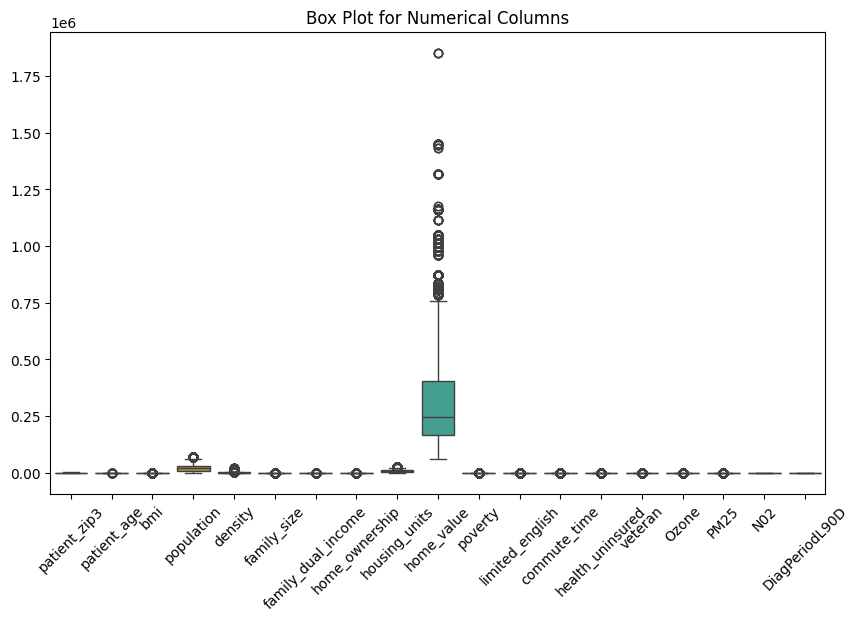

In [42]:

plt.figure(figsize=(10, 6))
sns.boxplot(numerical_columns)
plt.xticks(rotation=45)
plt.title('Box Plot for Numerical Columns')
plt.show()

In [ ]:
plt.figure(figsize=(30, 13))
sns.pairplot(numerical_columns, diag_kind='kde', markers='o', plot_kws={'alpha': 0.5},hue='DiagPeriodL90D')
plt.suptitle('Pair Plot of Numerical Columns')
plt.show()

<Figure size 3000x1300 with 0 Axes>

In [ ]:
df = numerical_columns

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:

train_race = train['patient_race'].value_counts()

# Plotting a bar chart with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=train_race.index, y=train_race.values)


In [ ]:

train_gender = train['patient_gender'].value_counts()

# Plotting a bar chart with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=train_gender.index, y=train_gender.values)

**Only females were affected by breast cancer**



In [ ]:
train_state = train['patient_state'].value_counts().head(10)

# Plotting a bar chart with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=train_state.index, y=train_state.values)



In [ ]:
train_state = train['patient_state'].value_counts().tail(10)

# Plotting a bar chart with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=train_state.index, y=train_state.values)

In [ ]:
train_state = train['breast_cancer_diagnosis_desc'].value_counts().tail(10)

# Plotting a bar chart with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=train_state.index, y=train_state.values)

In [ ]:
train_state = train['Region'].value_counts().tail(10)

# Plotting a bar chart with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=train_state.index, y=train_state.values)

In [ ]:
train_state = train['Division'].value_counts().tail(10)

# Plotting a bar chart with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=train_state.index, y=train_state.values)

In [ ]:
train_state = train['breast_cancer_diagnosis_desc'].value_counts().tail(10)

# Plotting a bar chart with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=train_state.index, y=train_state.values)

**CARLIFORNIA,TEXAS,NEYWORK are the top state**
**RI,NH,MA** ARE THE BOTTOM STATES


In [ ]:
train_diag = train['metastatic_cancer_diagnosis_code'].value_counts().head(10)

# Plotting a bar chart with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=train_diag.index, y=train_diag.values)
plt.xticks(rotation=45)

In [ ]:
# Assuming 'DiagPeriodL90D' has two unique values
train_diag = train['DiagPeriodL90D'].value_counts()

# Specify two colors for the pie chart
colors = ['skyblue', 'lightcoral']

# Plotting a pie chart with Seaborn
plt.figure(figsize=(10, 6))
plt.pie(x=train_diag.values, labels=train_diag.index, autopct='%1.1f%%', colors=colors)
plt.title('Pie Chart for DiagPeriodL90D')
plt.show()

**62% of the patients were diagnosed in less than 90 days while 37.5 were diagnised in more than 90 days.**


In [ ]:
numerical_columns.describe()

In [ ]:
# Fixed range for each bar
df = train['patient_age'].value_counts()
range_value = 10


plt.bar(df.index, df.values, yerr=range_value, capsize=10, color='skyblue', alpha=1)

# Add labels and title
plt.xlabel('Patient Age')
plt.ylabel('Count')
plt.title('Bar Plot of Patient Age with Error Bars')


**most of the patient diagnosed are between the age of 55 - 65 with the mean being 59 years of age
**mean for family size if 3 member per family**

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='patient_state', y='patient_zip3', data=train)
plt.title('Bar Plot: Mean of NumericalColumn by CategoricalColumn')
plt.xticks(rotation = 45)
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='patient_state', hue='DiagPeriodL90D', data=train)
plt.title('Comparison of CategoricalColumn1 and CategoricalColumn2')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
train.corr()

plt.figure(figsize=(10, 8))
correlation_matrix = train.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# **FEATURE SELECTION AND LINEAR REGRESSION**

In [ ]:
train

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Sample DataFrame with categorical variables


# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each column with categorical data
for column in train.columns:
    if train[column].dtype == 'object':  # Check if the column contains categorical data
        train[column] = label_encoder.fit_transform(train[column])
        # Retrieve original labels
        original_labels = label_encoder.classes_
        # Display mapping between encoded values and original labels
        print(f"Mapping for {column}: {dict(zip(range(len(original_labels)), original_labels))}")

# Display the modified DataFrame
#print(df)

In [ ]:
train.info()

In [ ]:

train = train.drop(['patient_gender'], axis=1)

In [ ]:
#dividing the training setand the test set
X_data= train.iloc[:, :-1]  # Select all columns except the last one
y_data = train.iloc[:, -1]   # Select only the last column

# Display the independent and dependent variables
print("Independent Variables (X):")
print(X_data)
print("\nDependent Variable (y):")
print(y_data)

In [ ]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import MinMaxScaler

# Assuming continuous_features is a list of continuous feature names
continuous_features = ['patient_age', 'bmi', 'population', 'density', 'family_size', 'home_value', 'commute_time', 'Ozone', 'PM25', 'N02']

# Extract the continuous features from the DataFrame
X_continuous = X_data[continuous_features]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the continuous features
X_continuous_scaled = scaler.fit_transform(X_continuous)

# Replace the original continuous features with the scaled features in the DataFrame
X_data[continuous_features] = X_continuous_scaled

In [ ]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import MinMaxScaler

# Assuming continuous_features is a list of continuous feature names
categorical_features = ['patient_race','payer_type','patient_state','breast_cancer_diagnosis_code','breast_cancer_diagnosis_desc','metastatic_cancer_diagnosis_code','Region','Division','limited_english','health_uninsured','veteran']
# Extract the continuous features from the DataFrame
X_cat = X_data[categorical_features]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the continuous features
X_cat_scaled = scaler.fit_transform(X_cat)

# Replace the original continuous features with the scaled features in the DataFrame
X_data[categorical_features] = X_cat_scaled

In [ ]:
# Get feature names
feature_names = X_data[categorical_features].columns.tolist()

# Create f_classif object to calculate F-value
f_values, p_values = f_classif(X_data[categorical_features], y_data)

# Create a DataFrame to store feature names and F-values
feature_importance_ct = pd.DataFrame({'Feature': feature_names, 'F-value': f_values})
feature_importance_ct = feature_importance_ct.sort_values(by='F-value', ascending=False)
# Display the feature importance DataFrame
print(feature_importance_ct)

In [70]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

# Get feature names
feature_names = X_data[continuous_features].columns.tolist()

# Create f_classif object to calculate F-value
f_values, p_values = f_classif(X_data[continuous_features], y_data)

# Create a DataFrame to store feature names and F-values
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'F-value': f_values})
feature_importance_df = feature_importance_df.sort_values(by='F-value', ascending=False)
# Display the feature importance DataFrame
print(feature_importance_df)

        Feature    F-value
0   patient_age  40.063299
5    home_value  11.745391
6  commute_time   9.676385
4   family_size   9.225522
3       density   3.856665
8          PM25   3.505984
7         Ozone   0.800100
2    population   0.557928
1           bmi   0.132761
9           N02   0.007489


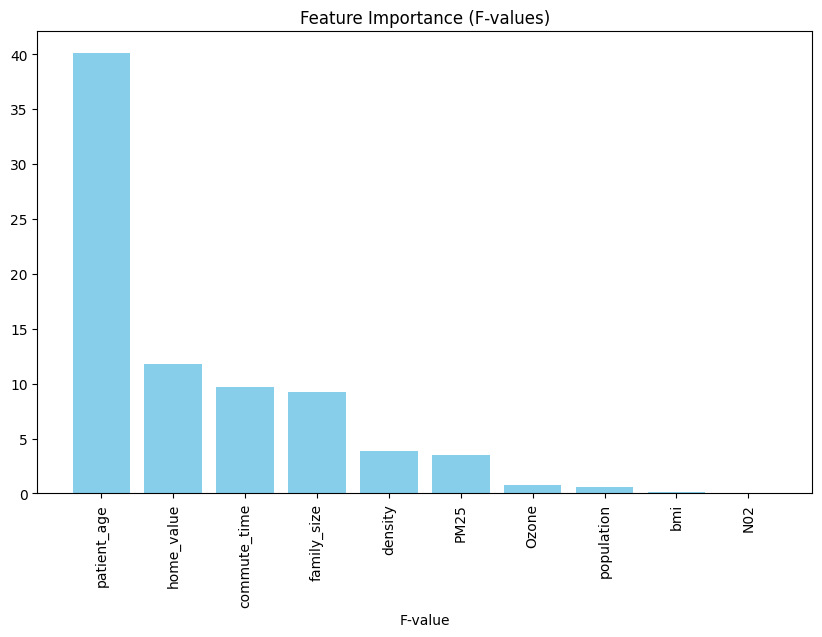

In [71]:
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['F-value'], color='skyblue',)
plt.xlabel('F-value')
plt.title('Feature Importance (F-values)')
plt.xticks(rotation = 'vertical')
plt.show()

In [90]:
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_ct['Feature'], feature_importance_ct['F-value'], color='skyblue',)
plt.xlabel('F-value')
plt.title('Feature Importance (F-values)')
plt.xticks(rotation = 'vertical')
plt.show()

NameError: name 'feature_importance_ct' is not defined

<Figure size 1000x600 with 0 Axes>

In [75]:
to_drop = ['density', 'PM25', 'Ozone', 'population', 'bmi', 'N02', 'patient_race', 'Region', 'limited_english', 'Division', 'veteran']

# Remove specified columns
x_data = X_data.drop(to_drop, axis=1)

# Display the DataFrame after removing columns
print(x_data.head())

   payer_type  patient_state  patient_zip3  patient_age  \
0    0.333333       0.081633           924     0.904110   
1    0.000000       0.081633           928     0.602740   
2    0.000000       0.877551           760     0.342466   
3    0.000000       0.081633           926     0.369863   
4    0.000000       0.265306           836     0.506849   

   breast_cancer_diagnosis_code  breast_cancer_diagnosis_desc  \
0                      0.979592                      0.857143   
1                      0.591837                      0.244898   
2                      0.367347                      0.469388   
3                      0.448980                      0.081633   
4                      0.142857                      0.367347   

   metastatic_cancer_diagnosis_code  family_size  family_dual_income  \
0                          0.976190     0.849744           52.228571   
1                          0.071429     0.661172           61.736364   
2                          0.071429   

In [ ]:
x_data.shape

In [76]:
# Step 4 : train test split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(x_data,y_data, train_size=0.7, random_state=2529)

In [77]:
# check shape of train and test sample
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((9034, 15), (3872, 15), (9034,), (3872,))

In [92]:
result_dict_train = {}
result_dict_test = {}

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Create a logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Display results
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report_result)

Accuracy: 0.7732438016528925

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.63      0.67      1440
           1       0.80      0.86      0.83      2432

    accuracy                           0.77      3872
   macro avg       0.76      0.74      0.75      3872
weighted avg       0.77      0.77      0.77      3872



In [91]:
print("Train Score:",np.mean(accuracies))
print("Test Score:",model.score(x_test,y_test))

Train Score: 0.7811608111925997
Test Score: 0.7732438016528925


In [94]:
result_dict_train["Model Train Score"] = np.mean(accuracies)
result_dict_test["Model Test Score"] = model.score(x_test,y_test)

The provided results are from the evaluation of a classification model. Let's break down the key metrics:

Accuracy: 0.7732 (77.32%):

Definition: Accuracy is the ratio of correctly predicted instances to the total number of instances in the dataset. It provides an overall measure of how well the model is performing across all classes.
Interpretation: In this case, the model achieved an accuracy of 77.32%, meaning that approximately 77.32% of the instances in the test set were correctly classified.
Classification Report:

The classification report provides a more detailed breakdown of performance metrics for each class in the dataset.

Precision:

Precision is the ratio of correctly predicted positive observations to the total predicted positives. It measures the accuracy of the positive predictions.
Precision for class 0: 72% (0.72)
Precision for class 1: 80% (0.80)
Recall (Sensitivity):

Recall is the ratio of correctly predicted positive observations to all the actual positives. It measures the ability of the model to capture all the relevant instances.
Recall for class 0: 63% (0.63)
Recall for class 1: 86% (0.86)
F1-Score:

F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall.
F1-score for class 0: 67% (0.67)
F1-score for class 1: 83% (0.83)
Support:

Support is the number of actual occurrences of the class in the specified dataset.
Accuracy, Macro Avg, Weighted Avg:

Macro Avg: Unweighted average of precision, recall, and F1-score across classes.
Weighted Avg: Weighted average of precision, recall, and F1-score based on the number of instances in each class.
Interpretation:

The classification report provides a detailed view of the model's performance for each class. In this example, the model performs better for class 1, as indicated by higher precision, recall, and F1-score values. Class 1 has a higher support value, indicating it has more instances in the dataset.
These metrics collectively help assess the model's ability to correctly classify instances, balancing precision and recall for each class. The choice of which metric is more important depends on the specific goals of the classification task.

In [95]:
knn = KNeighborsClassifier()
accuracies = cross_val_score(knn, x_train, y_train, cv=5)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

#Obtain accuracy
print("Train Score:",np.mean(accuracies))
print("Test Score:",knn.score(x_test,y_test))

Train Score: 0.6673677056310483
Test Score: 0.675103305785124


In [97]:
#Store results in the dictionaries
result_dict_train["KNN Train Score"] = np.mean(accuracies)
result_dict_test["KNN Test Score"] = knn.score(x_test,y_test)

In [98]:
svc = SVC(random_state = 42)
accuracies = cross_val_score(svc, x_train, y_train, cv=5)
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)

#Obtain accuracy
print("Train Score:",np.mean(accuracies))
print("Test Score:",svc.score(x_test,y_test))

Train Score: 0.6229798476577797
Test Score: 0.628099173553719


In [99]:
#Store results in the dictionaries
result_dict_train["SVM Train Score"] = np.mean(accuracies)
result_dict_test["SVM Test Score"] = svc.score(x_test,y_test)

In [100]:
rfc = RandomForestClassifier(random_state = 42)
accuracies = cross_val_score(rfc, x_train, y_train, cv=5)
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)

#Obtain accuracy
print("Train Score:",np.mean(accuracies))
print("Test Score:",rfc.score(x_test,y_test))

Train Score: 0.7811608111925997
Test Score: 0.7864152892561983


In [101]:
#Store results in the dictionaries
result_dict_train["Random Forest Train Score"] = np.mean(accuracies)
result_dict_test["Random Forest Test Score"] = rfc.score(x_test,y_test)

In [102]:
gnb = GaussianNB()
accuracies = cross_val_score(gnb, x_train, y_train, cv=5)
gnb.fit(x_train,y_train)
y_pred = gnb.predict(x_test)

#Obtain accuracy
print("Train Score:",np.mean(accuracies))
print("Test Score:",gnb.score(x_test,y_test))

Train Score: 0.7768421194554707
Test Score: 0.7851239669421488


In [103]:
#Store results in the dictionaries
result_dict_train["Gaussian NB Train Score"] = np.mean(accuracies)
result_dict_test["Gaussian NB Test Score"] = gnb.score(x_test,y_test)

In [104]:
df_result_train = pd.DataFrame.from_dict(result_dict_train,orient = "index", columns=["Score"])
df_result_train

,Score
Model Train Score,0.781161
KNN Train Score,0.667368
SVM Train Score,0.622980
Random Forest Train Score,0.781161
Gaussian NB Train Score,0.776842


In [105]:
df_result_test = pd.DataFrame.from_dict(result_dict_test,orient = "index",columns=["Score"])
df_result_test

,Score
Model Test Score,0.773244
KNN Test Score,0.675103
SVM Test Score,0.628099
Random Forest Test Score,0.786415
Gaussian NB Test Score,0.785124


<ipython-input-106-efca24718707>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(df_result_train.index,rotation = 75)
<ipython-input-106-efca24718707>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(df_result_test.index,rotation = 75)


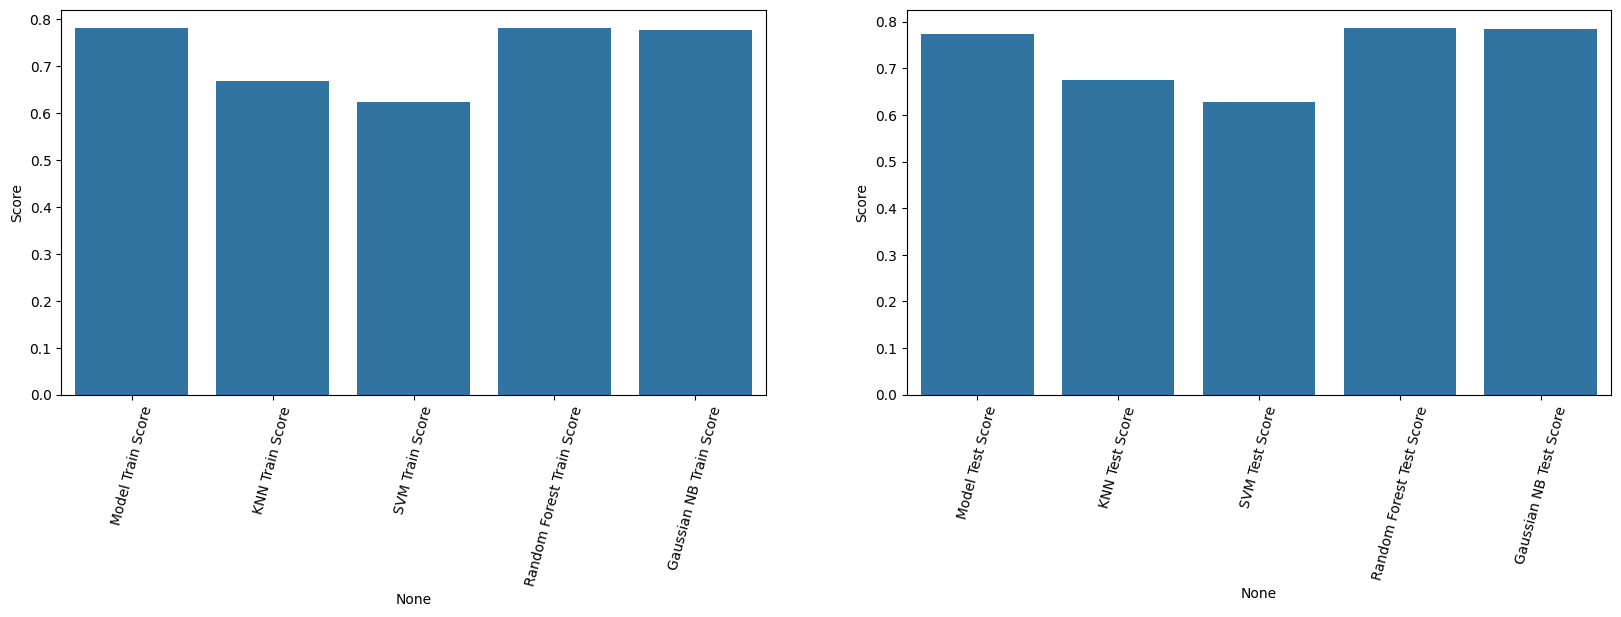

In [106]:
import seaborn as sns

fig,ax = plt.subplots(1,2,figsize=(20,5))
sns.barplot(x = df_result_train.index,y = df_result_train.Score,ax = ax[0])
sns.barplot(x = df_result_test.index,y = df_result_test.Score,ax = ax[1])
ax[0].set_xticklabels(df_result_train.index,rotation = 75)
ax[1].set_xticklabels(df_result_test.index,rotation = 75)
plt.show()